In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('CitiBike_with_weather.csv')

C:\Users\anika\AppData\Local\Temp\ipykernel_15112\2820563072.py:1: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('CitiBike_with_weather.csv')


In [3]:
#date column as index
df_weather = df.set_index('date')

In [4]:
df_weather.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,avgWeather,_merge
date,,,,,,,,,,,,,,,
2021-01-30,34BD74D84D320CF5,electric_bike,2021-01-30 17:30:45.544,2022-05-23 06:17:27.131,W 144 St & Adam Clayton Powell Blvd,7932.1,Frederick Douglass Blvd & W 112 St,7631.23,40.820877,-73.939249,40.801694,-73.957145,casual,NaN,left_only
2021-02-15,FA436228F4CD7647,classic_bike,2021-02-15 14:11:20.946,2022-08-10 15:01:30.839,Kent Ave & S 11 St,5062.01,Union Ave & Jackson St,5300.06,40.707645,-73.968415,40.716075,-73.952029,casual,NaN,left_only
2021-03-11,8FC77EAE2C0561E4,classic_bike,2021-03-11 22:08:54.461,2022-06-16 09:12:21.565,Union St & 4 Ave,4175.15,Flatbush Ave & Ocean Ave,3704.04,40.677274,-73.982820,40.663657,-73.963014,casual,NaN,left_only
2021-03-14,BF45D1E037463AA8,classic_bike,2021-03-14 18:17:59.923,2022-02-02 23:38:01.993,N 12 St & Bedford Ave,5450.04,S Portland Ave & Hanson Pl,4354.05,40.720798,-73.954847,40.685396,-73.974315,member,NaN,left_only
2021-03-31,763D82F8CFA1D9D1,classic_bike,2021-03-31 15:35:20.070,2022-09-25 14:33:21.607,Willoughby St & Fleet St,4628.05,DeKalb Ave & Franklin Ave,4528.01,40.691966,-73.981302,40.690648,-73.957462,casual,NaN,left_only


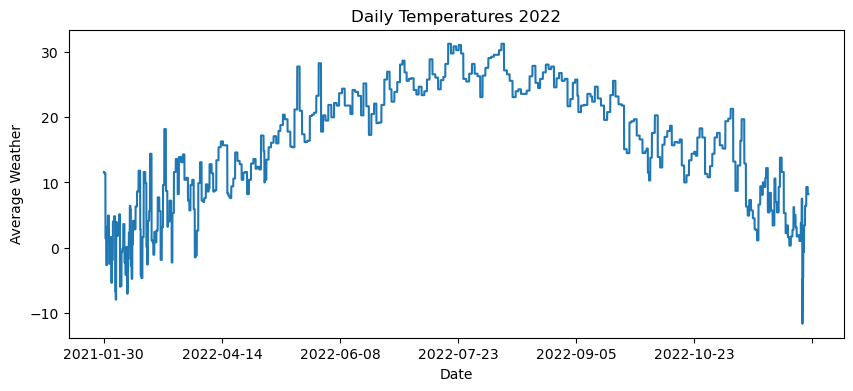

In [7]:
# Plot average weather
df_weather['avgWeather'].plot(figsize=(10,4))
plt.title('Daily Temperatures 2022')
plt.xlabel('Date')
plt.ylabel('Average Weather')
plt.show()

In [8]:
plt.savefig('daily_temperatures_2022.png', dpi=300, bbox_inches='tight')
plt.show()

<Figure size 640x480 with 0 Axes>

In [9]:
#Group and count trips per day
df_group = df.groupby('date')['ride_id'].count().reset_index()
df_group.rename(columns={'ride_id':'bike_rides_daily'}, inplace=True)

In [10]:
#Merge with main dataframe
df = df.merge(df_group, on='date', how='outer')

In [11]:
#Reset Index
df_temp = df.set_index('date')

In [14]:
# Convert index to datetime
df_temp.index = pd.to_datetime(df_temp.index)

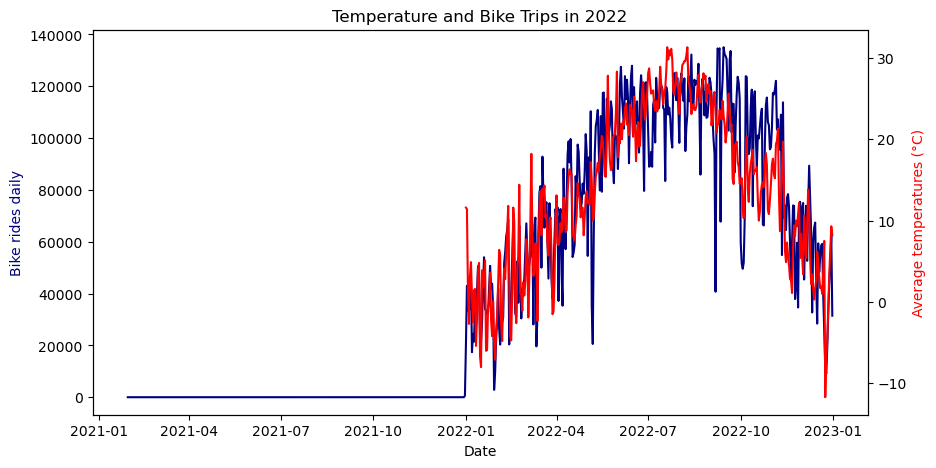

In [16]:
# Create figure and axis
fig, ax = plt.subplots(figsize=(10,5))

ax.plot(df_temp['bike_rides_daily'], color='navy')
ax.set_xlabel("Date")
ax.set_ylabel("Bike rides daily", color='navy')

ax2 = ax.twinx()
ax2.plot(df_temp['avgWeather'], color='red')
ax2.set_ylabel("Average temperatures (°C)", color='red')

plt.title('Temperature and Bike Trips in 2022')
plt.show()

In [18]:
# Save the plot
plt.savefig('bike_trips_vs_temperature.png', dpi=300, bbox_inches='tight')
plt.show()

<Figure size 640x480 with 0 Axes>

In [19]:
#Explanation of Approach
#Procedural (Functional) Approach: Used pandas .plot() and matplotlib.pyplot functions directly.
#Object-Oriented Approach: Created fig and ax objects with plt.subplots(), then added a second axis using ax.twinx() for a dual-axis chart.
#The Object-Oriented approach makes it easier to customize labels, and add multiple y-axes without losing clarity.

In [20]:
import seaborn as sns
import numpy as np

In [21]:
# Calculate trip duration in minutes
df['tripduration'] = (pd.to_datetime(df['ended_at']) - pd.to_datetime(df['started_at'])).dt.total_seconds() / 60

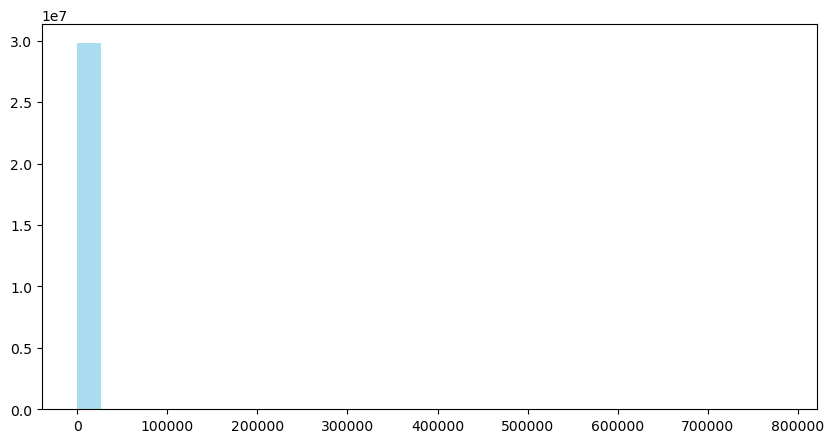

In [22]:
#Create histogram
plt.figure(figsize=(10, 5))
counts, bins, _ = plt.hist(df['tripduration'], bins=30, color='skyblue', alpha=0.7, label='Trip Duration')

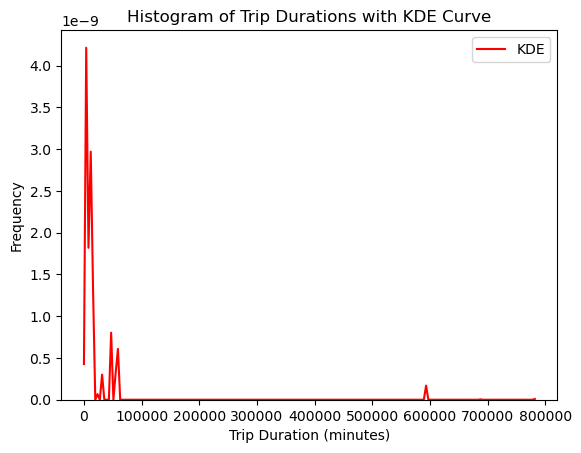